<a href="https://colab.research.google.com/github/behzcd/Data-Science-and-AI/blob/main/DL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Semantic Segmentation

We will build a model of the `semantic segmentation` technology, which is very important for self-driving cars.  That is, our model separates different objects in the picture and shows them in different colors.

We'll use the dataset which is used in the scientific article - `Semantic object classes in video: A high-definition ground truth database`.

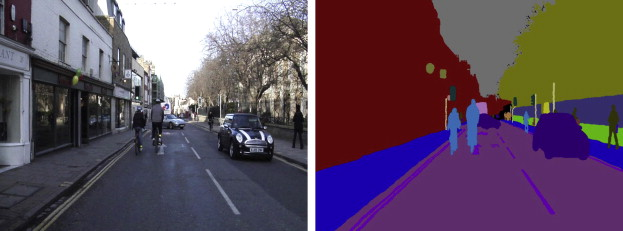

In [1]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)


#label getter function
def label_get(file):
  return path/'labels'/f"{file.stem}_P{file.suffix}"

#dataloaders
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func=label_get, 
                                              codes=np.loadtxt(path/'codes.txt', dtype=str))
#fine-tuning
learn = unet_learner(dls, resnet34)
learn.fine_tune(12)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.315651,2.403382,00:08


epoch,train_loss,valid_loss,time
0,1.782030,1.513728,00:01
1,1.562009,1.349805,00:01
2,1.409055,1.477522,00:01
3,1.352390,1.117969,00:01
4,1.229682,0.890440,00:01
5,1.112143,0.817902,00:01
6,1.012073,0.772783,00:01
7,0.923657,0.738547,00:01
8,0.847643,0.716425,00:01
9,0.781958,0.720751,00:01


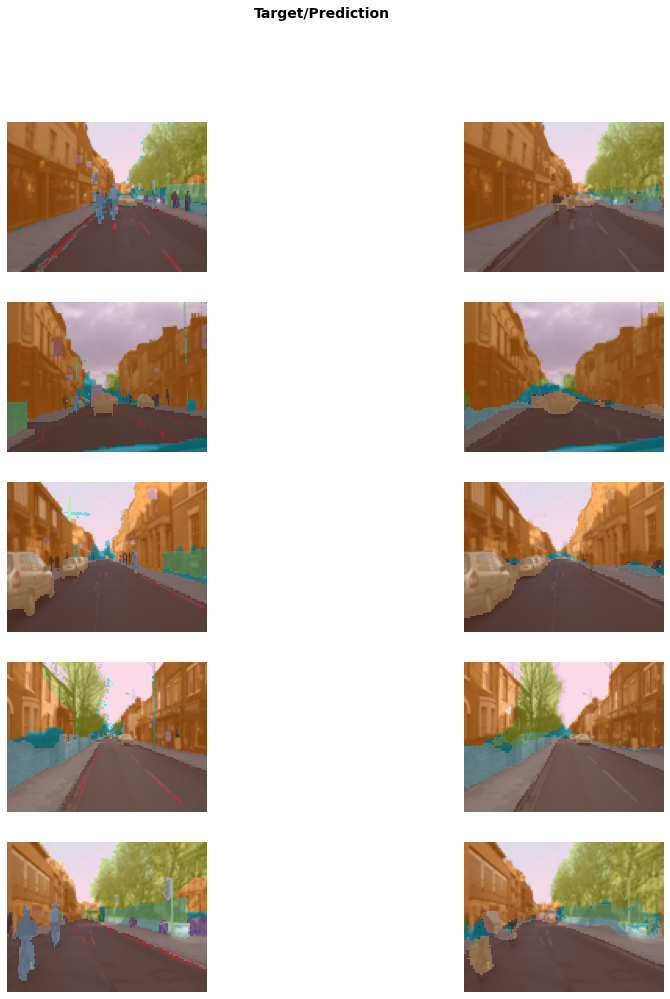

In [2]:
learn.show_results(max_n=5, figsize=(15,16))